In [55]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
#plt.style.use('ggplot')
pd.set_option('display.max_rows', 500)
pd.options.display.float_format = '{:,.2f}'.format

In [57]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score


# Data Cleaning

In [58]:
#df_sales = pd.read_csv("data/item_sales.csv")
df_sales = pd.read_csv("/content/drive/MyDrive/data/item_sales.csv")

In [82]:
df_sales.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               30490 non-null  object
 1   item             30490 non-null  object
 2   category         30490 non-null  object
 3   department       30490 non-null  object
 4   store            30490 non-null  object
 5   store_code       30490 non-null  object
 6   region           30490 non-null  object
 7   Total_de_Vendas  30490 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 1.9+ MB


In [60]:
df_sales.head(5)

,id,item,category,department,store,store_code,region,d_1,d_2,d_3,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,ACCESORIES_1_001_NYC_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,ACCESORIES_1_002_NYC_1,ACCESORIES_1_002,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,ACCESORIES_1_003_NYC_1,ACCESORIES_1_003,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,ACCESORIES_1_004_NYC_1,ACCESORIES_1_004,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,ACCESORIES_1_005_NYC_1,ACCESORIES_1_005,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,2,1,1,0,1,1,2,2,2,4


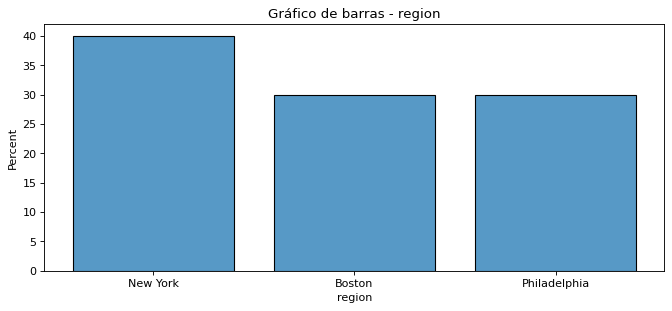

In [61]:
plt.figure(figsize=(10, 4), dpi=80)
sns.histplot(data=df_sales, x="region", shrink=.8, stat='percent')
plt.title("Gráfico de barras - region")
plt.show()

In [62]:
df_sales['region'].value_counts(normalize=True)

New York       0.40
Boston         0.30
Philadelphia   0.30
Name: region, dtype: float64

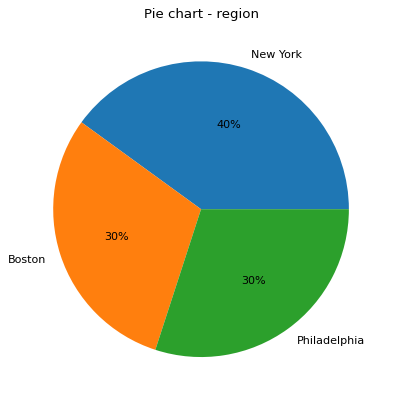

In [63]:
plt.figure(figsize=(6, 6), dpi=80, facecolor='white')
plt.pie(df_sales['region'].value_counts(normalize=True)*100, labels = df_sales['region'].value_counts(normalize=True).index, autopct='%.0f%%')
plt.title("Pie chart - region")
plt.show()

In [64]:
df_sales.describe()

,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
count,"30,490.00","30,490.00","30,490.00","30,490.00","30,490.00","30,490.00","30,490.00","30,490.00","30,490.00","30,490.00",...,"30,490.00","30,490.00","30,490.00","30,490.00","30,490.00","30,490.00","30,490.00","30,490.00","30,490.00","30,490.00"
mean,1.07,1.04,0.78,0.83,0.63,0.96,0.92,1.24,1.07,0.84,...,1.37,1.59,1.69,1.25,1.23,1.16,1.15,1.33,1.61,1.63
std,5.13,5.37,3.67,4.42,3.38,4.79,5.06,6.62,5.92,4.21,...,3.74,4.10,4.36,3.28,3.13,2.88,2.95,3.36,4.09,3.81
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1.00,2.00,2.00,1.00,1.00,1.00,1.00,1.00,2.00,2.00
max,360.00,436.00,207.00,323.00,296.00,314.00,316.00,370.00,385.00,353.00,...,129.00,160.00,204.00,98.00,100.00,88.00,77.00,141.00,171.00,130.00


In [65]:
colunas = df_sales.columns
colunas

Index(['id', 'item', 'category', 'department', 'store', 'store_code', 'region',
       'd_1', 'd_2', 'd_3',
       ...
       'd_1904', 'd_1905', 'd_1906', 'd_1907', 'd_1908', 'd_1909', 'd_1910',
       'd_1911', 'd_1912', 'd_1913'],
      dtype='object', length=1920)

In [66]:
# list_columns = ""
lista_valores = []

for i in range(1, 1914):
    # Adiciona o valor "d_" seguido do número à lista
    lista_valores.append("d_" + str(i))

df_sales[lista_valores].astype("int16")

,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,0,0,0,0,0,0,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,0,0,0,0,0,0,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,0,0,0,0,0,0,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,0,0,2,2,0,3,1,4,1,0,...,2,0,0,0,0,0,1,0,0,1
30486,0,0,0,0,0,5,0,1,1,3,...,0,0,0,0,0,0,0,0,1,0
30487,0,6,0,2,2,4,1,8,5,2,...,2,1,0,2,0,1,0,0,1,0
30488,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,3,1,3


In [67]:
vendas = df_sales.iloc[:, 7:]
vendas

,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,0,0,0,0,0,0,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,0,0,0,0,0,0,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,0,0,0,0,0,0,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,0,0,2,2,0,3,1,4,1,0,...,2,0,0,0,0,0,1,0,0,1
30486,0,0,0,0,0,5,0,1,1,3,...,0,0,0,0,0,0,0,0,1,0
30487,0,6,0,2,2,4,1,8,5,2,...,2,1,0,2,0,1,0,0,1,0
30488,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,3,1,3


In [68]:
soma_vendas = vendas.sum(axis=1)

In [69]:
df_sales["Total_de_Vendas"] = soma_vendas

In [70]:
#df_sales["Total_de_Vendas"]

In [71]:
# Determine o número total de colunas no DataFrame
num_colunas = len(df_sales.columns)
num_colunas

1921

In [72]:
# Crie uma lista com as posições das colunas que você deseja eliminar
posicoes_a_eliminar = list(range(7, min(1920, num_colunas)))  # Colunas de 7 a 1913 ou até o número total de colunas

In [73]:
# Use o método drop para remover as colunas pelas posições especificadas
df_sales = df_sales.drop(df_sales.columns[posicoes_a_eliminar], axis=1)

In [74]:
df_sales.head()

,id,item,category,department,store,store_code,region,Total_de_Vendas
0,ACCESORIES_1_001_NYC_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,600
1,ACCESORIES_1_002_NYC_1,ACCESORIES_1_002,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,493
2,ACCESORIES_1_003_NYC_1,ACCESORIES_1_003,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,288
3,ACCESORIES_1_004_NYC_1,ACCESORIES_1_004,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,3288
4,ACCESORIES_1_005_NYC_1,ACCESORIES_1_005,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,1849


In [77]:
df1 = df_sales[["id", "item", "category", df_sales.columns[-1]]]
df1 = df1.sort_values(by=df1.columns[-1], ascending=False)
df1.head(20)

,id,item,category,Total_de_Vendas
8412,SUPERMARKET_3_090_NYC_3,SUPERMARKET_3_090,SUPERMARKET,250502
18055,SUPERMARKET_3_586_BOS_2,SUPERMARKET_3_586,SUPERMARKET,192835
21104,SUPERMARKET_3_586_BOS_3,SUPERMARKET_3_586,SUPERMARKET,150122
8908,SUPERMARKET_3_586_NYC_3,SUPERMARKET_3_586,SUPERMARKET,134386
2314,SUPERMARKET_3_090_NYC_1,SUPERMARKET_3_090,SUPERMARKET,127203
29755,SUPERMARKET_3_090_PHI_3,SUPERMARKET_3_090,SUPERMARKET,121434
17559,SUPERMARKET_3_090_BOS_2,SUPERMARKET_3_090,SUPERMARKET,119496
20608,SUPERMARKET_3_090_BOS_3,SUPERMARKET_3_090,SUPERMARKET,114854
17721,SUPERMARKET_3_252_BOS_2,SUPERMARKET_3_252,SUPERMARKET,114153
15006,SUPERMARKET_3_586_BOS_1,SUPERMARKET_3_586,SUPERMARKET,112454


In [79]:
df1 = df_sales[["department", "store", "region", df_sales.columns[-1]]]
df1 = df1.sort_values(by=df1.columns[-1], ascending=False)
df1.head(20)

,department,store,region,Total_de_Vendas
8412,SUPERMARKET_3,Tribeca,New York,250502
18055,SUPERMARKET_3,Roxbury,Boston,192835
21104,SUPERMARKET_3,Back_Bay,Boston,150122
8908,SUPERMARKET_3,Tribeca,New York,134386
2314,SUPERMARKET_3,Greenwich_Village,New York,127203
29755,SUPERMARKET_3,Queen_Village,Philadelphia,121434
17559,SUPERMARKET_3,Roxbury,Boston,119496
20608,SUPERMARKET_3,Back_Bay,Boston,114854
17721,SUPERMARKET_3,Roxbury,Boston,114153
15006,SUPERMARKET_3,South_End,Boston,112454


In [81]:
# Menos vendidos

df1.tail(10)

,department,store,region,Total_de_Vendas
25,ACCESORIES_1,Greenwich_Village,New York,21
10214,HOME_&_GARDEN_1,Brooklyn,New York,20
10458,HOME_&_GARDEN_2,Brooklyn,New York,19
6733,HOME_&_GARDEN_1,Tribeca,New York,19
6992,HOME_&_GARDEN_1,Tribeca,New York,18
26276,SUPERMARKET_2,Yorktown,Philadelphia,16
20192,SUPERMARKET_2,Back_Bay,Boston,16
27606,ACCESORIES_1,Queen_Village,Philadelphia,13
6048,SUPERMARKET_3,Harlem,New York,12
6682,HOME_&_GARDEN_1,Tribeca,New York,10


Label Encoding

In [83]:
def label_encoding(df, coluna):
  """
  Função para realizar Label Encoding em uma coluna específica de um DataFrame.

  Argumentos:
    df: DataFrame que contém a coluna a ser codificada.
    coluna: Nome da coluna a ser codificada.

  Retorno:
    DataFrame com a coluna codificada.
  """

  # Cria um objeto LabelEncoder
  le = LabelEncoder()

  # Ajusta o LabelEncoder aos dados da coluna
  le.fit(df[coluna])

  # Transforma os dados da coluna em valores numéricos
  df[coluna] = le.transform(df[coluna])

  # Retorna o DataFrame com a coluna codificada
  return df

In [84]:
df1 = label_encoding(df_sales, 'id')
df1 = label_encoding(df_sales, 'item')
df1 = label_encoding(df_sales, 'category')
df1 = label_encoding(df_sales, 'department')
df1 = label_encoding(df_sales, 'store')
df1 = label_encoding(df_sales, 'store_code')
df1 = label_encoding(df_sales, 'region')

# CLUSTERING

In [85]:
df1.head(1)

,id,item,category,department,store,store_code,region,Total_de_Vendas
0,3,0,0,0,2,3,1,600


In [113]:
# Selecionar as colunas
colunas = ['item', 'store', 'Total_de_Vendas']

# Transformar em um np.array
array = df1[colunas].to_numpy()

# Verificar o resultado
print(array)

# Contar as linhas
numero_linhas = len(array)

# Verificar o resultado
print("total de linhas :", numero_linhas)

[[   0    2  600]
 [   1    2  493]
 [   2    2  288]
 ...
 [3046    5 1712]
 [3047    5  702]
 [3048    5 1329]]
total de linhas : 30490


In [114]:
# Normalização das features

scaler = StandardScaler()
array = scaler.fit_transform(array)

In [115]:
# Imputação de valores ausentes usando a mediana

imputer = SimpleImputer(strategy='median')
array = imputer.fit_transform(array)

Gráfico do cotovelo - para verificar a quantidade de clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

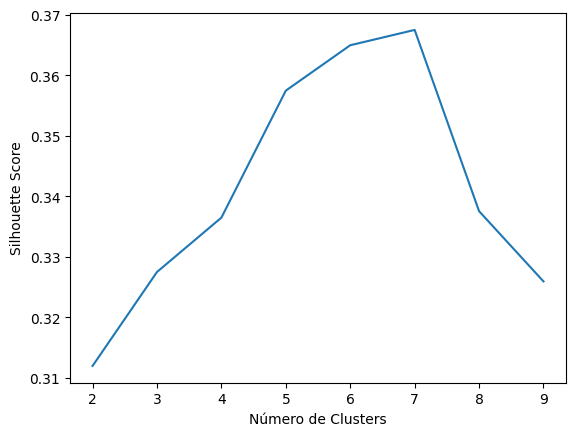

In [116]:
scores = []
for k in range(2, 10):
  kmeans = KMeans(n_clusters=k, random_state=0)
  kmeans.fit(array)
  scores.append(silhouette_score(array, kmeans.labels_))

# Visualizar o gráfico do cotovelo

plt.plot(range(2, 10), scores)
plt.xlabel('Número de Clusters')
plt.ylabel('Silhouette Score')
plt.show()

Treinar o modelo K-Means

In [117]:
data = array

# Vamos definir o número de clusters que queremos encontrar
num_clusters = 3  # Você pode ajustar esse valor conforme necessário

# Vamos extrair apenas as colunas relevantes para clustering (Total_de_Vendas, por exemplo)
X = data[:, 2:]  # Aqui estamos selecionando todas as linhas e apenas as colunas 2 em diante (índices 0, 1 e 2)

# Inicialize o modelo de clustering (K-Means neste caso)
kmeans = KMeans(n_clusters=num_clusters)

# Ajuste o modelo aos dados
kmeans.fit(X)

# Obtenha os rótulos de cluster para cada ponto de dados
labels = kmeans.labels_

# Agora você pode usar esses rótulos para separar seus dados em diferentes clusters
# Por exemplo, você pode criar uma lista de arrays onde cada array contém os pontos de dados pertencentes a um cluster específico

clusters = []
for i in range(num_clusters):
    cluster_i = data[labels == i]
    clusters.append(cluster_i)

# 'clusters' agora contém uma lista de arrays, onde cada array contém pontos de dados pertencentes a um cluster específico
# Você pode acessar cada cluster pelo índice na lista 'clusters'

# Exemplo de como acessar o primeiro cluster:
primeiro_cluster = clusters[0]

print("Primeiro cluster: ", clusters[0])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Primeiro cluster:  [[-1.73148283 -0.87038828 -0.29798971]
 [-1.73034669 -0.87038828 -0.31849902]
 [-1.72921054 -0.87038828 -0.35779258]
 ...
 [ 1.72921054  0.17407766 -0.08484614]
 [ 1.73034669  0.17407766 -0.27843877]
 [ 1.73148283  0.17407766 -0.158258  ]]


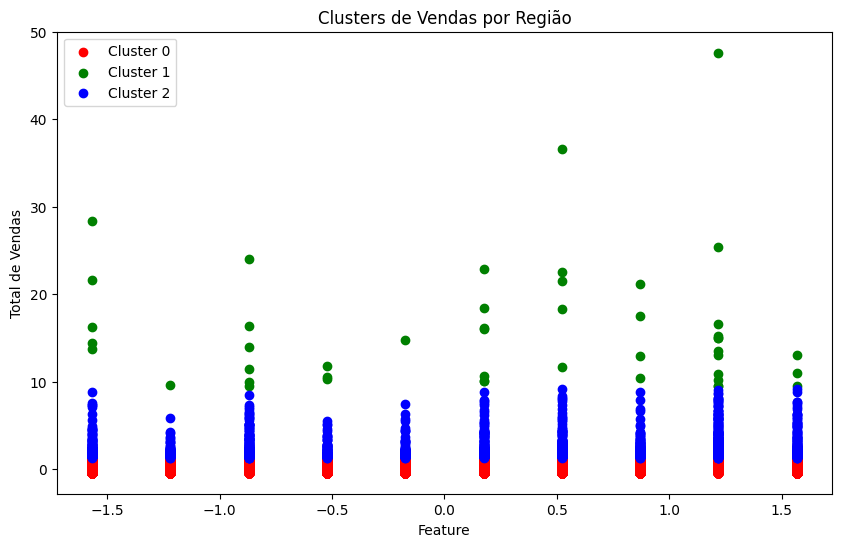

In [118]:
# Plotar os clusters

plt.figure(figsize=(10, 6))

# Cores para os clusters
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']

# Percorra os clusters e plote os pontos de dados pertencentes a cada cluster
for i in range(num_clusters):
    cluster_i = data[labels == i]
    plt.scatter(cluster_i[:, 1], cluster_i[:, 2], c=colors[i], label=f'Cluster {i}')

# Adicione rótulos aos eixos e título ao gráfico
plt.xlabel('Feature')
plt.ylabel('Total de Vendas')
plt.title('Clusters de Vendas por Região')

# Adicione uma legenda
plt.legend()

# Mostre o gráfico
plt.show()